###  Load packages

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Task 1/5: Approximating functions

### Linear methods

In [2]:
def linearLS(x, fx):
    """ Computes the Matrix A from A*x=fx or rather from minimization of |fx-x*A.T| with least-sqaures minimization

    param x: x values of the data points where we have the belonging y values
    type x: numpy array with size: number of samples x number of dimensions of samples
    param fx: function / y values of the given data points
    type fx: numpy array: number of samples x dimension of y values
    return: parameters of linear transformation which map the x values best possible to the y values 
    rtype: numpy array: dimension of y values x dimension of x values  
    """
    return np.linalg.lstsq(x, fx, rcond = 0.1)[0].T

### Non linear methods

In [3]:
def radialBasisFunction(x, x_L, eps):
    """ Computes the radial basis function for one single x value

    param x: point for which the radial basis function is computed
    type x: numpy array: 1 x dimension of point x
    param x_L: single center of radial basis function where the function maps to the maximum value 1
    type x_L: numpy array: 1 x dimension of point x and x_L
    param eps: bandwidth of radial basis function
    type eps: float64 
    return: value of the radial basis function for the given x value
    rtype: float64  
    """
    return np.exp(-sum((x_L-x)**2)/(eps**2))

In [4]:
def basisTrafo(x, x_L, eps):
    """ Transforms the data x (NxD) to the matrix phi (NxL) under the usage of the L different radial basis functions with corresponding centers x_L and bandwidth eps

    param x: data matrix x which is transformed
    type x: numpy array: N x D
    param x_L: all L different centers x_L of the L different radial basis functions
    type x_L: numpy array: L x D
    param eps: bandwidth of radial basis function
    type eps: float64
    return: transformed data matrix x, which is called phi 
    rtype: numpy array: N x L 
    """
    phi = np.array([[radialBasisFunction(x[i,:], center, eps) for center in x_L] for i in range(x.shape[0])])
    return phi

In [5]:
def nonlinearLS(x, fx, eps, L):
    """ Randomly selects L centers for the radial basis functions and computes the transformation matrix C, which minimises |fx-phi(x)*C.T|, with least-sqaures minimization

    param x: data matrix x which is transformed
    type x: numpy array: N x D
    param fx: corresponding target data matrix fx which we want to approximate
    type fx: numpy array: N x E
    param eps: bandwidth of radial basis function
    type eps: float64
    param L: number of radial basis functions that are used
    typeL: int
    return: transformation matrix C, centers of radial basis functions
    rtype: numpy array, dimension of y values x L    
    """
    # randomly choose L data pointsx for the centers of the radial basis functions
    rd.seed(41)
    centers = x[rd.sample(range(x.shape[0]), L)]
    # transformation of the data matrix x to the new data matrix phi
    phi = basisTrafo(x, centers, eps)
    return np.linalg.lstsq(phi, fx, rcond = None)[0].T, centers

In [6]:
def loadData(filename):
    """
    param filename: name of the file where we want to load the data
    type filename: string
    return: data x, and corresponding function values fx
    rtype: numpy array: N x D, numpy array: N x E
    """
    data = np.loadtxt(filename)
    x = np.reshape(data[:,0], (data.shape[0], -1))
    fx = np.reshape(data[:,1], (data.shape[0], -1))
    return x, fx

In [7]:
def plotApprox(x, fx, trafo, filename, nonLinear = False):
    """ Plots the data and the approximation function of the data either with linear or with non linear transformation
    param x: data matrix x which is transformed
    type x: numpy array: N x D
    param fx: corresponding target data matrix fx which we want to approximate
    type fx: numpy array: N x E
    param trafo: Transformation matrix A (nonlinear = False) OR [C, centers(x_L), eps] (nonlinear = True) 
    type trafo: numpy array: N x y-dimension (nonlinear = False) OR list(numpy array: N x L, numpy array: L x x-dimension, float64) (nonlinear = True)
    param nonLinear: says if non linear or linear transformation was used for function approximation 
    type nonLinear: boolean
    param filename: name of sved plot
    type string
    return: plot of data and data approximation   
    """
    # create figure
    fig, ax = plt.subplots()
    # plot data
    ax.plot(x, fx, 'o', label='Data Original', markersize=3)

    # construct x values for the approximation function between the highest and lowest data point in x
    x_approx = np.linspace(min(x)-1, max(x)+1, 100)

    if nonLinear is False:
        # linearly approximate y 
        y_approx = x_approx @ trafo.T
    else:
        # transform constructed x values 
        phi_approx = basisTrafo(x_approx, trafo[1], trafo[2])
        # approximate y with transformed data x 
        y_approx = phi_approx @ trafo[0].T
    # plot approximation ffunction of the data
    ax.plot(x_approx, y_approx, label='Data Approximation')
    # label axes
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    # turn grid on
    plt.grid()
    # insert legend
    plt.legend(loc='upper left')
    # show plot
    plt.show() 
    # save plot
    fig.savefig(filename, dpi=200)

### Task 1.1

In [8]:
# load linear data
a, fa = loadData('linear_function_data.txt')

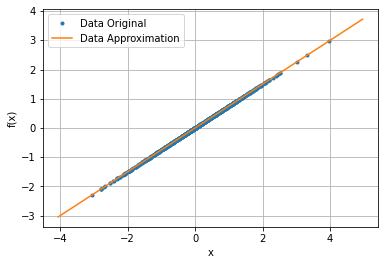

In [9]:
# compute linear transformation matrix for best data approximation
A = linearLS(a, fa)
# plot data and data approximation
plotApprox(a, fa, A, 'task1_LinearApproxLinear.png')

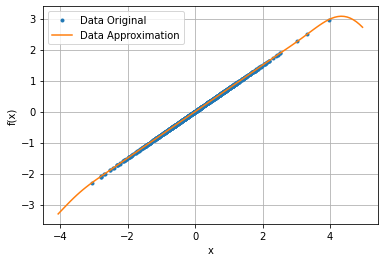

In [10]:
# set radial basis function bandwidth
eps = 2
# set number of radial basis functions that are used to approximate the data
L = 15
# compute the transformation matrix of the non linear transformed data and the centers of the corresponding radial basis functions  
Ca, centers = nonlinearLS(a, fa, eps, L)
# construt the non linear transformation parameter in a list for the final plot
Transformation = [Ca, centers, eps, L]
# plot data and the data approximation
plotApprox(a, fa, Transformation, 'task1_LinearApproxnonLinear.png', nonLinear = True)

### Task 1.2

In [11]:
# load non linear data
b, fb = loadData('nonlinear_function_data.txt')

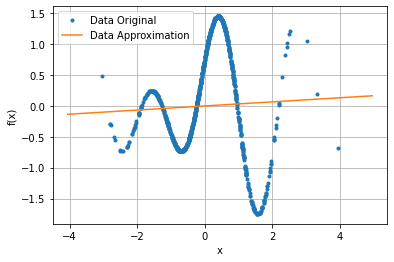

In [12]:
# compute linear transformation matrix for best data approximation
B = linearLS(b, fb)
# plot data and data approximation
plotApprox(b, fb, B, 'task1_nonLinearApproxLinear.png')

### Task 1.3

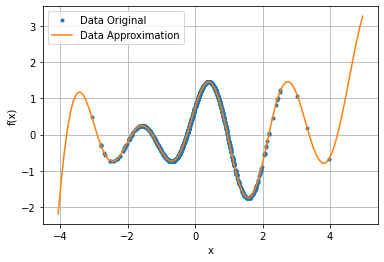

In [13]:
# set radial basis function bandwidth
eps = 2
# set number of radial basis functions that are used to approximate the data
L = 15
# compute the transformation matrix of the non linear transformed data and the centers of the corresponding radial basis functions  
Cb, centers = nonlinearLS(b, fb, eps, L)
# construt the non linear transformation parameter in a list for the final plot
Transformation = [Cb, centers, eps]
# plot data and the data approximation
plotApprox(b, fb, Transformation, 'task1_nonLinearApproxnonLinear.png', nonLinear = True)

### Task 1.4

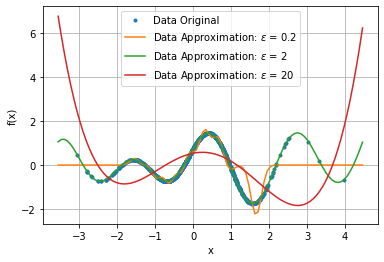

In [14]:
# set radial basis function bandwidth
eps = [0.2, 2, 20]
# set number of radial basis functions that are used to approximate the data
L = 15
# create figure
fig, ax = plt.subplots()
# plot data
ax.plot(b, fb, 'o', label='Data Original', markersize=3)
# construct x values for the approximation function between the highest and lowest data point in x
x_approx = np.linspace(min(b)-0.5, max(b)+0.5, 100)

for n in range(len(eps)):
    # compute the transformation matrix of the non linear transformed data and the centers of the corresponding radial basis functions  
    Cb, centers = nonlinearLS(b, fb, eps[n], L)
    # transform constructed x values 
    phi_approx = basisTrafo(x_approx, centers, eps[n])
    # approximate y with transformed data x 
    y_approx = phi_approx @ Cb.T
    # plot approximation ffunction of the data
    ax.plot(x_approx, y_approx, label = r'Data Approximation: $\epsilon$ = ' + str(eps[n]))

# label axes
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
# turn grid on
plt.grid()
# insert legend
plt.legend(loc='upper center')
# show plot
plt.show() 
# save plot
fig.savefig('task1_eps.png', dpi=300)

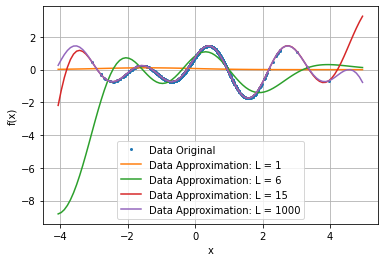

In [15]:
# set radial basis function bandwidth
eps = 2
# set number of radial basis functions that are used to approximate the data
L = [1, 6, 15, 1000]
# create figure
fig, ax = plt.subplots()
# plot data
ax.plot(b, fb, 'o', label='Data Original', markersize=2)
# construct x values for the approximation function between the highest and lowest data point in x
x_approx = np.linspace(min(b)-1, max(b)+1, 100)

for n in range(len(L)):
    # compute the transformation matrix of the non linear transformed data and the centers of the corresponding radial basis functions  
    Cb, centers = nonlinearLS(b, fb, eps, L[n])
    # transform constructed x values 
    phi_approx = basisTrafo(x_approx, centers, eps)
    # approximate y with transformed data x 
    y_approx = phi_approx @ Cb.T
    # plot approximation ffunction of the data
    ax.plot(x_approx, y_approx, label = 'Data Approximation: L = ' + str(L[n]))

# label axes
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
# turn grid on
plt.grid()
# insert legend
plt.legend(loc='lower center')
# show plot
plt.show() 
# save plot
fig.savefig('task1_L.png', dpi=300)